In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [43]:
# Assuming your data is loaded in a pandas DataFrame
df = pd.read_csv("/Users/minsu/Desktop/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [47]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
X_scaled = X_scaled.reshape(-1, 2, 4, 1)

In [53]:
# 훈련 세트와 검증 세트로 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [55]:
# CNN 모델 구축
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(2, 4, 1)),
    MaxPooling2D(pool_size=(1, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # 이진 분류를 위한 시그모이드 출력
])

/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 1, 3, 32)       │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,513 (17.63 KB)

 Trainable params: 4,513 (17.63 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6900 - loss: 0.6476 - val_accuracy: 0.6829 - val_loss: 0.6286
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7780 - loss: 0.5718 - val_accuracy: 0.7073 - val_loss: 0.5985
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7483 - loss: 0.5469 - val_accuracy: 0.7398 - val_loss: 0.5627
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7492 - loss: 0.5263 - val_accuracy: 0.7317 - val_loss: 0.5446
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7533 - loss: 0.5201 - val_accuracy: 0.7317 - val_loss: 0.5338
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7926 - loss: 0.5021 - val_accuracy: 0.7317 - val_loss: 0.5178
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7758 - loss: 0.4690 - val_accuracy: 0.7073 - val_loss: 0.5198
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7837 - loss: 0.4831 - val_accuracy: 0.7073 - val_loss

In [67]:
from sklearn.metrics import accuracy_score, f1_score

y_pred_clf =  model.predict(X_test)

# 확률을 0 또는 1로 변환 (0.5를 기준으로 이진화)
y_pred_clf = (y_pred_clf > 0.5).astype(int)
# F1 스코어
f1 = f1_score(y_test, y_pred_clf)
y_acc_clf = accuracy_score(y_test, y_pred_clf)

print(f'acc: {y_acc_clf:.2f}')
print(f'f1: {f1:.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
acc: 0.79
f1: 0.70


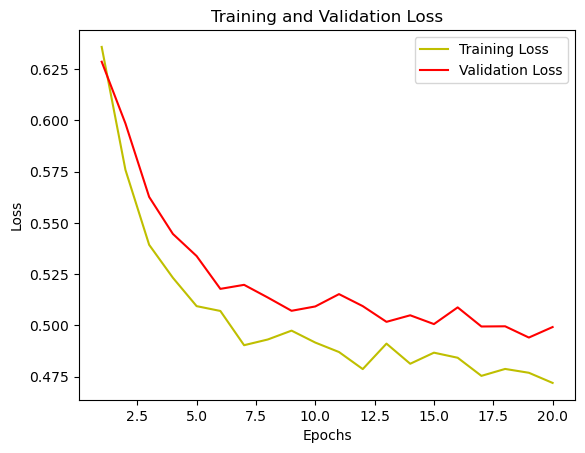

In [69]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

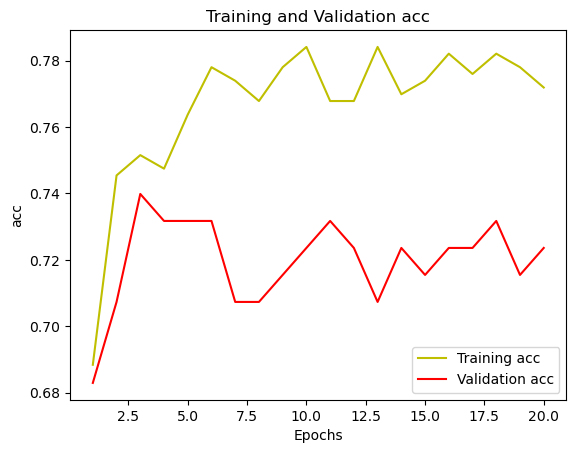

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [103]:
# 학습된 모델 저장
model.save('cnn_diabetes_model.h5')